# Ford GoBike sharing
## by Hesham Khalil

## Investigation Overview

> In this investigation, we will investigate dataset that provided from ford bikes sharing system that happen in Feb 2019 in San Francisco Bay area and Chicago.

## Dataset Overview

> Dataset contains variables as below:
- Member Year of Birth
- Member Gender
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Trip Duration(in seconds)
- Bike ID
- Start Time and Date
- End Time and Date
- Start Station ID
- End Station ID
- Start Station Name
- End Station Name
- End Station Latitude
- End Station Longitude
- Start Station Latitude
- Start Station Longitude

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests
from io import BytesIO
from zipfile import ZipFile
import glob
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('gobike_clean.csv')

In [3]:
gobike['start_time'] = pd.to_datetime(gobike['start_time'], format='%Y-%m-%d %H:%M:%S')

gobike['end_time'] = pd.to_datetime(gobike['end_time'], format='%Y-%m-%d %H:%M:%S')

gobike['start_hour'] = gobike['start_time'].dt.hour

gobike['end_hour'] = gobike['end_time'].dt.hour
gobike['Start_date'] = pd.to_datetime(gobike['start_time']).dt.to_period('D')

gobike['Start_time'] = gobike['start_time'].dt.strftime('%H:%M:%S')


gobike['End_date'] = pd.to_datetime(gobike['end_time']).dt.to_period('D')

gobike['End_time'] = gobike['end_time'].dt.strftime('%H:%M')

pd.to_datetime(gobike['Start_time'],format= '%H:%M:%S' ).dt.time
pd.to_datetime(gobike['End_time'],format= '%H:%M' ).dt.time

0         08:01:00
1         05:24:00
2         04:02:00
3         00:20:00
4         00:19:00
            ...   
174872    00:12:00
174873    00:10:00
174874    00:08:00
174875    00:07:00
174876    00:04:00
Name: End_time, Length: 174877, dtype: object

In [4]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174877 entries, 0 to 174876
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               174877 non-null  int64         
 1   duration_sec             174877 non-null  int64         
 2   start_time               174877 non-null  datetime64[ns]
 3   end_time                 174877 non-null  datetime64[ns]
 4   start_station_name       174877 non-null  object        
 5   end_station_name         174877 non-null  object        
 6   bike_id                  174877 non-null  int64         
 7   user_type                174877 non-null  object        
 8   member_birth_year        174877 non-null  float64       
 9   member_gender            174877 non-null  object        
 10  bike_share_for_all_trip  174877 non-null  object        
 11  member_age               174877 non-null  int64         
 12  age_group       

## Duration of Bike rides

> By checking plots we knew that average durations is most probably around 10 minutes

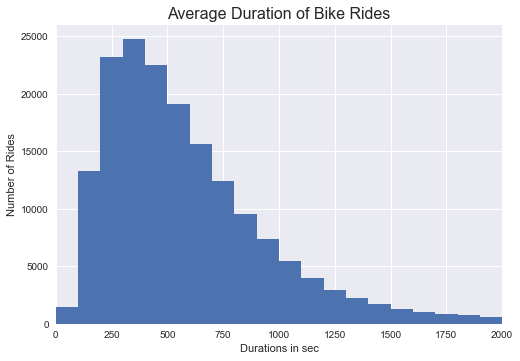

In [54]:
# start with a standard-scaled plot
binsize = 100
bins = np.arange(0, gobike['duration_sec'].max()+binsize, binsize)

plt.hist(data = gobike, x = 'duration_sec', bins = bins)
plt.xlim(0, 2000)

plt.xlabel('Durations in sec')
plt.ylabel('Number of Rides')
plt.title('Average Duration of Bike Rides', fontsize = 16)
plt.style.use('seaborn')
plt.show();

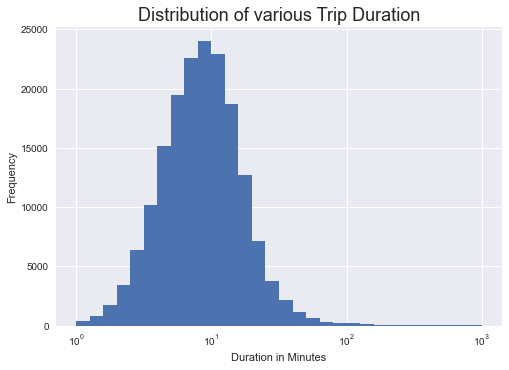

In [53]:
# Converting the trip durations from seconds to minutes 

gobike['duration_min'] = gobike['duration_sec'] / 60

binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = gobike , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration', size = 18)
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

## Number of rides per day

> the end of the month was the most number of rides have been done and specifically in 20, 21 ,22 and 28 of the february had the most rides with over 5000 rides each day.

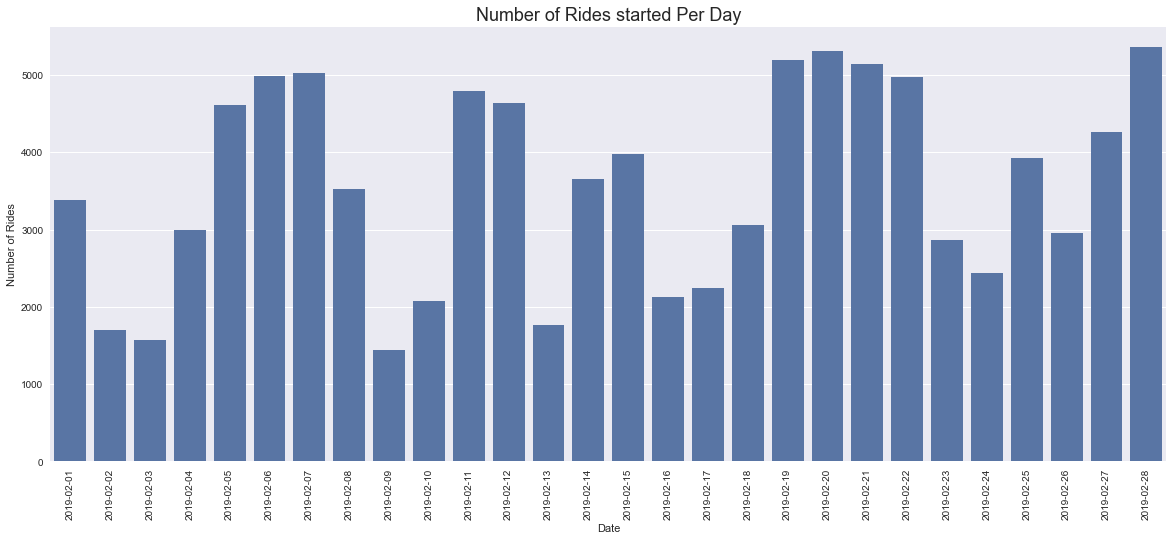

In [6]:
#Visualizing the data with a sample of 100000 records for start date of trips
plt.figure(figsize = (20, 8))
base_color = sb.color_palette()[0]
gobike_df_samp = gobike.sample(100000)
sb.countplot(data = gobike_df_samp.sort_values(by='Start_date'), x = 'Start_date', color = base_color);
plt.title('Number of Rides started Per Day', fontsize = 18)
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 90);
plt.style.use('seaborn')

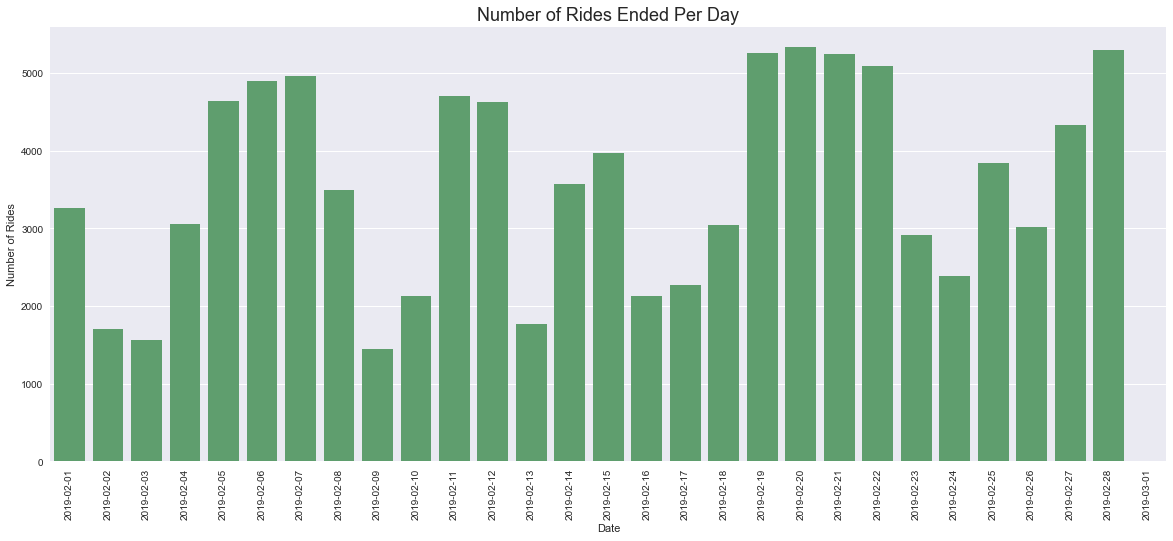

In [7]:
#Visualizing the data with a sample of 100000 records for End Date of trips
plt.figure(figsize = (20, 8))
base_color = sb.color_palette()[1]
gobike_df_samp = gobike.sample(100000)
sb.countplot(data = gobike_df_samp.sort_values(by='End_date'), x = 'End_date', color = base_color);
plt.title('Number of Rides Ended Per Day', fontsize = 18)
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 90);
plt.style.use('seaborn')

## The Hourly-wise Trip Duration Trend

* as per above plot most of the trips starts between 10 AM and 3 PM
* the highest duration is at the morning time between 7 AM to 10 AM

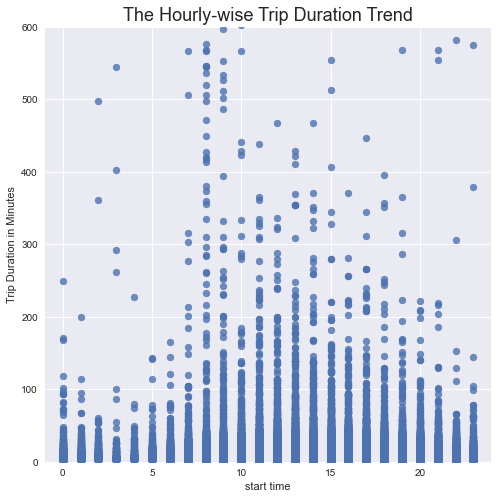

In [51]:
# plot corelation between when the trip start and duration
plt.figure(figsize = [8,8]) # Makes the figure enlarged for better visualization 
plt.scatter(data = gobike , x = 'start_hour' , y = 'duration_min' , alpha = 0.8 )
plt.axis([-1, 24, 0, 600])
plt.title('The Hourly-wise Trip Duration Trend', size = 18)
plt.xlabel('start time')
plt.ylabel('Trip Duration in Minutes')
plt.show();

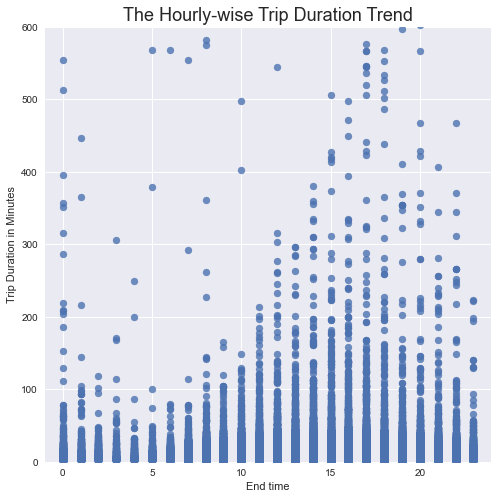

In [49]:
# plot corelation between when the trip end and duration
plt.figure(figsize = [8,8]) # Makes the figure enlarged for better visualization 
plt.scatter(data = gobike , x = 'end_hour' , y = 'duration_min' , alpha = 0.8 )
plt.axis([-1, 24, 0, 600])
plt.title('The Hourly-wise Trip Duration Trend', size =18)
plt.xlabel('End time')
plt.ylabel('Trip Duration in Minutes')
plt.show();

## Relationship between Age and trip duration
### is there a relationship between age and duration?
* as per plot between 20 and 40 years old the users are having the most durations and specifically in 30 they have the most duration
* the duration is decreasing whenever age increasing

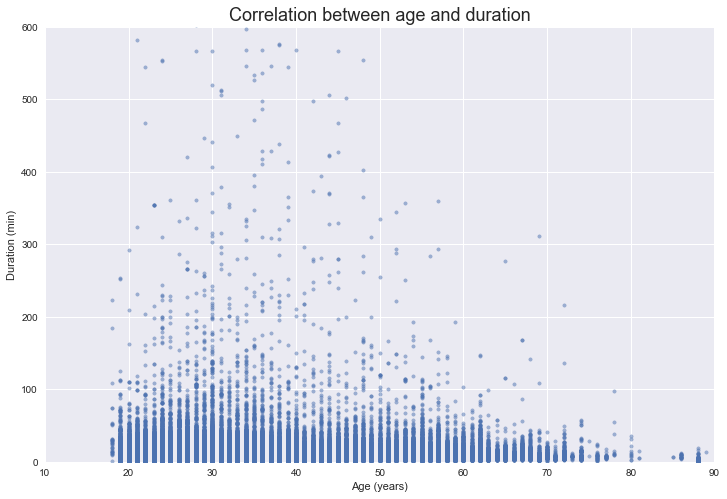

In [44]:
# correlation between age and duration
plt.figure(figsize=[12,8])
plt.scatter(gobike['member_age'], gobike['duration_min'], alpha = 0.50, marker = '.' )
plt.axis([10, 90, 0, 600])
plt.title('Correlation between age and duration', fontsize = 18)
plt.xlabel('Age (years)')
plt.ylabel('Duration (min)')
plt.show()

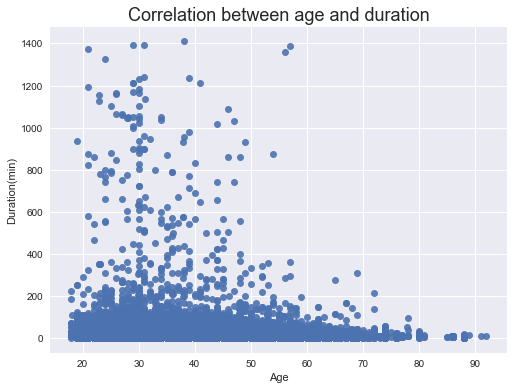

In [47]:
# PLOT Age & Duration
plt.figure(figsize = [18, 6])
plt.subplot(1, 2, 1)
sb.regplot(data = gobike, x = 'member_age', y = 'duration_min', x_jitter=0.04, scatter_kws={'alpha':9/10}, fit_reg=False)
plt.xlabel('Age')
plt.ylabel('Duration(min)')
plt.title('Correlation between age and duration', fontsize = 18);


## Gender, user type, duration and member age

Check if there corelation between gender, user type, duration and member age

* Subscriber have 90.8% of the rides while Customers made only 9.2% of the rides
* Most of the rides that ford bike sharing system get from their subscriber
* males mostly using bikes for normal duration except for males between 20 and 60 they have higher duration
* Females are using bikes the same but there is huge difference in age of 60 between females and males as it hugely drops(consider that on previous pie chart the percentage of females 22.9% only so they are not the same numbers as males so need more information for it)

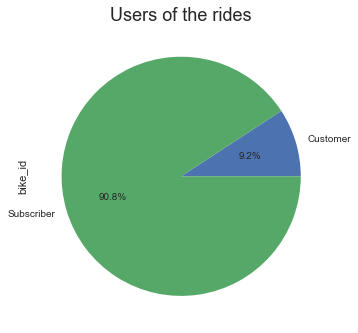

In [19]:
#groupby the data by user type
data = gobike.groupby("user_type")['bike_id'].sum()
data
plt.title('Users of the rides', fontsize = 18)
data.plot.pie(autopct="%.1f%%");

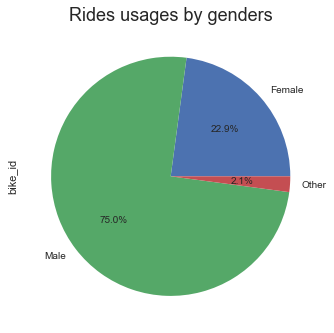

In [17]:
#groupby the data by gender
data = gobike.groupby("member_gender")['bike_id'].sum()
data
plt.title('Rides usages by genders', fontsize = 18)
data.plot.pie(autopct="%.1f%%");

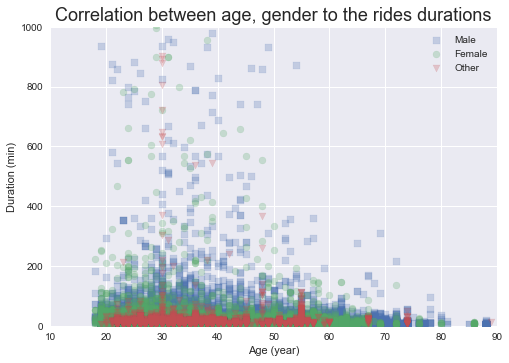

In [20]:
# is member age and gender related to the trip duration?
gender_markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]

for gender, marker in gender_markers:
    df_gender = gobike[gobike['member_gender'] == gender]
    plt.scatter(df_gender['member_age'], df_gender['duration_min'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other'])
plt.axis([10, 90, 0, 1000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (min)')
plt.title('Correlation between age, gender to the rides durations', fontsize = 18)
plt.show()

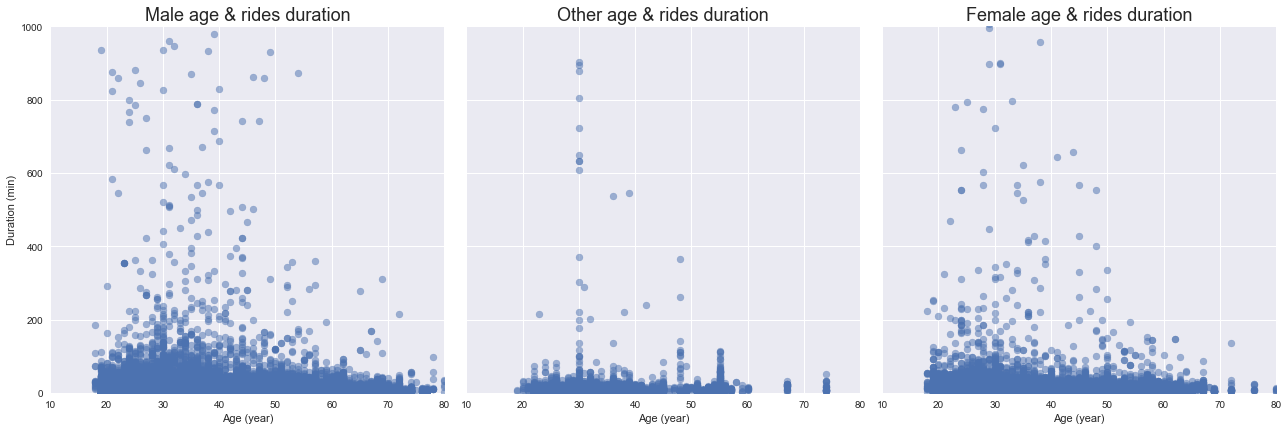

In [43]:
gobike['age'] = gobike['member_age']
genders = sb.FacetGrid(data = gobike, col = 'member_gender', col_wrap = 3, size = 6,
                 xlim = [10, 80], ylim = [0, 1000])
genders.map(plt.scatter, 'age', 'duration_min', alpha=0.50)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (min)')
genders.set_titles(col_template="{col_name} age & rides duration", size = 18)

plt.show()